In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import acf, pacf

Money_stock_df = pd.read_csv('./datasets/M2SLMoneyStock.csv', index_col=0, parse_dates=True)
Personal_spending_df = pd.read_csv('./datasets/PCEPersonalSpending.csv', index_col=0, parse_dates=True)


In [2]:
df = Money_stock_df.join(Personal_spending_df)
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


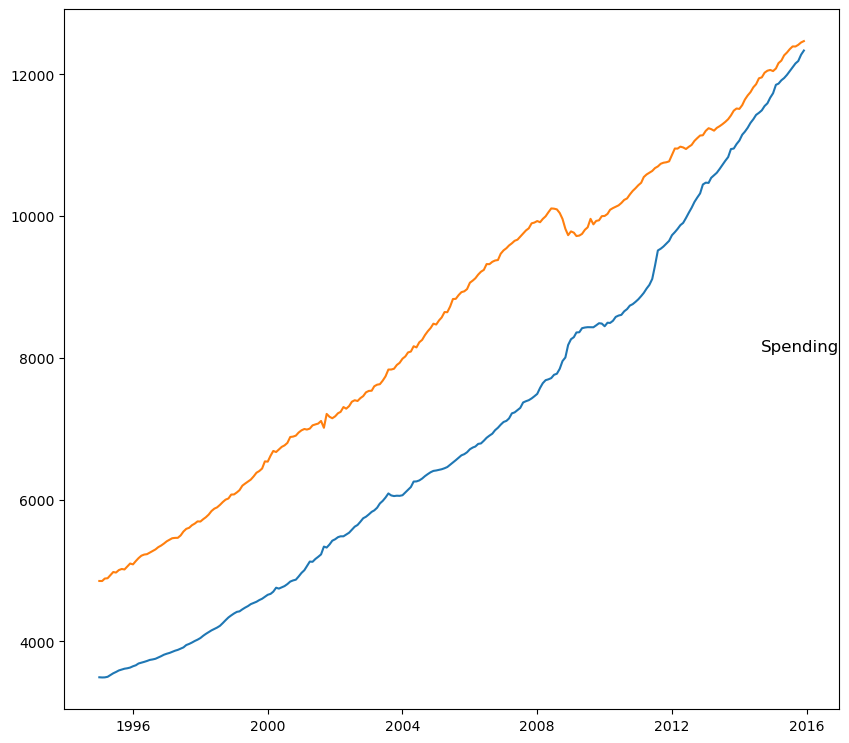

In [3]:
no_columns = len(df.columns)
index = 1

plt.figure(figsize=(10,20))
for col in df.columns:
    plt.subplot(no_columns, 1, index)
    plt.plot(df[col])
    plt.title(col, loc= 'right', y = 0.5)
plt.show()

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
maxLag= 10

grangercausalitytests_1 = grangercausalitytests(df[['Money', 'Spending']],maxlag=maxLag )


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.6517  , p=0.4195  , df=1
likelihood ratio test: chi2=0.6509  , p=0.4198  , df=1
parameter F test:         F=0.6439  , p=0.4231  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=6.2776  , p=0.0433  , df=2
likelihood ratio test: chi2=6.2001  , p=0.0450  , df=2
parameter F test:         F=3.0760  , p=0.0479  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=10.1034 , p=0.0177  , df=3
likelihood ratio test: chi2=9.9038  , p=0.0194  , df=3
parameter F test:         F=3.2731  , p=0.0218  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.6203  , p=0.0357  

In [5]:
grangercausalitytests_1 = grangercausalitytests(df[['Spending', 'Money']],maxlag=maxLag )


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1
ssr based chi2 test:   chi2=0.5927  , p=0.4414  , df=1
likelihood ratio test: chi2=0.5920  , p=0.4416  , df=1
parameter F test:         F=0.5856  , p=0.4448  , df_denom=248, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2
ssr based chi2 test:   chi2=1.3186  , p=0.5172  , df=2
likelihood ratio test: chi2=1.3151  , p=0.5181  , df=2
parameter F test:         F=0.6461  , p=0.5250  , df_denom=245, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3
ssr based chi2 test:   chi2=5.1771  , p=0.1593  , df=3
likelihood ratio test: chi2=5.1240  , p=0.1629  , df=3
parameter F test:         F=1.6772  , p=0.1725  , df_denom=242, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.5428  , p=0.1905  

In [6]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
det_order = 1
k_ar_diff = 1
joh_model= coint_johansen(df, det_order, k_ar_diff)
print('Trace :', joh_model.lr1)

Trace : [2.41347345e+00 4.52245463e-08]


In [7]:
#dickey_fuller test for Stationarity
from statsmodels.tsa.stattools import adfuller

def test_stationary(my_df):
    for col in my_df.columns:
        dftest = adfuller(my_df[col])
        dfoutput = pd.Series(dftest[0:4], index = ['The test statistics','Mackinnons approximate p-value', '#useLags', 'NOBS'])
        print("Columns :", col)
        print(dfoutput)

test_stationary(df)

Columns : Money
The test statistics                 4.239022
Mackinnons approximate p-value      1.000000
#useLags                            4.000000
NOBS                              247.000000
dtype: float64
Columns : Spending
The test statistics                 0.149796
Mackinnons approximate p-value      0.969301
#useLags                            3.000000
NOBS                              248.000000
dtype: float64


In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.10, shuffle=False)

In [11]:
from statsmodels.tsa.api import VAR
model = VAR(df)

c:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
maxlags = 10
model_order = model.select_order(maxlags)
model_order.summary()

,AIC,BIC,FPE,HQIC
0,27.86,27.89,1.262e+12,27.88
1,13.70,13.78*,8.886e+05,13.73
2,13.64,13.79,8.400e+05,13.70*
3,13.63,13.83,8.281e+05,13.71
4,13.63,13.89,8.346e+05,13.74
5,13.59*,13.91,8.008e+05*,13.72
6,13.61,13.99,8.174e+05,13.76
7,13.62,14.06,8.262e+05,13.80
8,13.65,14.14,8.477e+05,13.85
9,13.66,14.20,8.528e+05,13.88


In [13]:
lags =5
model_fitted = model.fit(lags)

In [14]:
lag_order = model_fitted.k_ar
print(lag_order)

5


In [16]:
forecast_input = train.values[-lag_order:]
nobs = len(test)
fc = model_fitted.forecast(y= forecast_input, steps = nobs)
df_fc = pd.DataFrame(fc, index= test.index, columns=test.columns)
df_fc

,Money,Spending
Date,,
2013-11-01,11004.815305,11465.194921
2013-12-01,11058.477718,11500.105252
2014-01-01,11119.640136,11536.809504
2014-02-01,11170.274815,11570.534806
2014-03-01,11224.543084,11606.224606
2014-04-01,11279.249967,11642.884692
2014-05-01,11332.014159,11679.233558
2014-06-01,11385.882017,11716.388229
2014-07-01,11439.784282,11753.768546


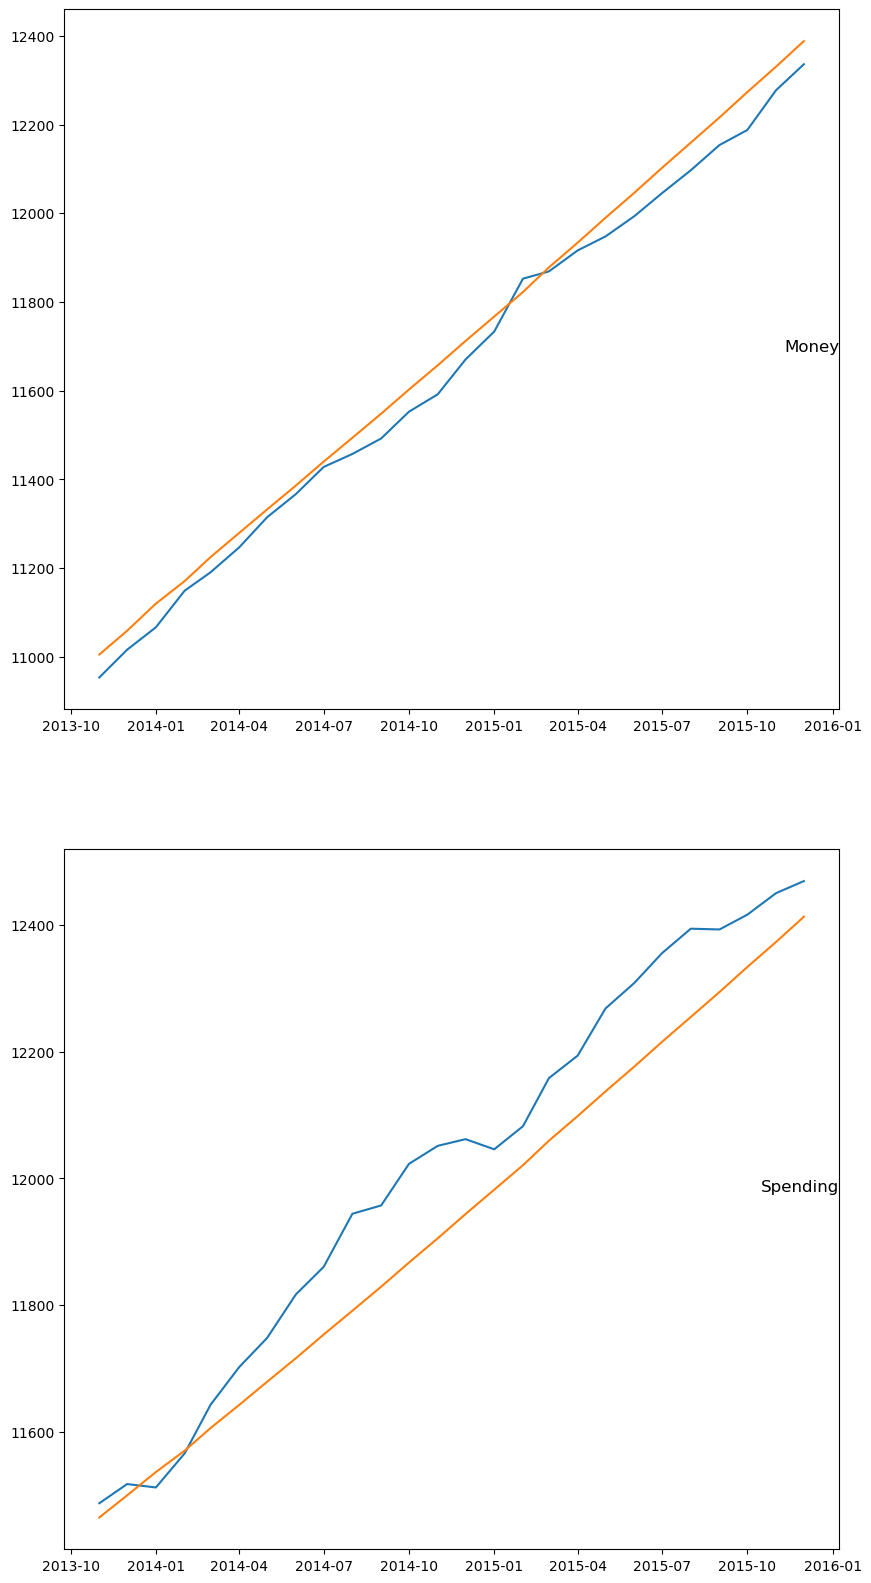

In [17]:
cols = len(test.columns)
index = 1
plt.figure(figsize=(10,20))
for col in test.columns:
    plt.subplot(cols, 1, index)
    plt.plot(test[col])
    plt.plot(df_fc[col])
    plt.title(col, loc= 'right', y=0.5)
    index +=1
plt.show()